 Edges represent the boundaries of an object or regions of the image where there is a significant change in intensity (brightness)

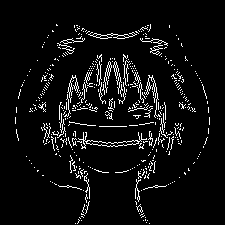

In [ ]:
'''explain python code for canny edge with these steps-Noise reduction (Gaussian blur), Gradient calculation,
Non-maximum suppression, Double thresholding ,Edge tracking'''
import cv2
import numpy as np
from google.colab.patches import cv2_imshow

# Step 1: Noise Reduction using Gaussian Blur
def gaussian_blur(image, kernel_size=5):
    # Use OpenCV's GaussianBlur function to smooth the image (remove noise)
    return cv2.GaussianBlur(image, (kernel_size, kernel_size), 0)

# Step 2: Gradient Calculation (using Sobel operators)
def gradient_calculation(image):
    # Apply Sobel operators to calculate gradients in both X and Y directions
    gradient_x = cv2.Sobel(image, cv2.CV_64F, 1, 0, ksize=3)
    gradient_y = cv2.Sobel(image, cv2.CV_64F, 0, 1, ksize=3)

    # Calculate magnitude and angle of gradient
    gradient_magnitude = np.sqrt(gradient_x**2 + gradient_y**2)
    gradient_angle = np.arctan2(gradient_y, gradient_x) * (180.0 / np.pi)  # Convert radians to degrees

    # Normalize the gradient magnitude to [0, 255] range for visualization
    gradient_magnitude = np.uint8(np.absolute(gradient_magnitude))

    return gradient_magnitude, gradient_angle

# Step 3: Non-Maximum Suppression
def non_maximum_suppression(gradient_magnitude, gradient_angle):
    # Get the dimensions of the image
    height, width = gradient_magnitude.shape
    suppressed_image = np.zeros_like(gradient_magnitude)

    # Loop through every pixel in the image
    for y in range(1, height - 1):
        for x in range(1, width - 1):
            # Find the angle of the gradient at this pixel
            angle = gradient_angle[y, x]

            # Convert angle to degrees between 0 and 180
            if (angle < 0):
                angle += 180

            # Check the orientation of the edge (0°, 45°, 90°, 135°)
            if (0 <= angle < 22.5) or (157.5 <= angle <= 180):
                neighbor1 = gradient_magnitude[y, x+1]
                neighbor2 = gradient_magnitude[y, x-1]
            elif (22.5 <= angle < 67.5):
                neighbor1 = gradient_magnitude[y+1, x-1]
                neighbor2 = gradient_magnitude[y-1, x+1]
            elif (67.5 <= angle < 112.5):
                neighbor1 = gradient_magnitude[y+1, x]
                neighbor2 = gradient_magnitude[y-1, x]
            else:  # (112.5 <= angle < 157.5)
                neighbor1 = gradient_magnitude[y-1, x-1]
                neighbor2 = gradient_magnitude[y+1, x+1]

            # Suppress the pixel if it is not a local maximum
            if (gradient_magnitude[y, x] >= neighbor1) and (gradient_magnitude[y, x] >= neighbor2):
                suppressed_image[y, x] = gradient_magnitude[y, x]
            else:
                suppressed_image[y, x] = 0

    return suppressed_image

# Step 4: Double Thresholding
def double_thresholding(image, low_threshold, high_threshold):
    strong_edges = np.zeros_like(image)
    weak_edges = np.zeros_like(image)

    # Identify strong and weak edges based on threshold values
    strong_edges[image > high_threshold] = 255
    weak_edges[(image >= low_threshold) & (image <= high_threshold)] = 75

    return strong_edges, weak_edges

# Step 5: Edge Tracking by Hysteresis
def edge_tracking(strong_edges, weak_edges):
    # Get the dimensions of the image
    height, width = strong_edges.shape

    # Create a final output image
    final_edges = np.copy(strong_edges)

    # Perform edge tracking by hysteresis: Weak edges connected to strong edges become strong edges
    for y in range(1, height - 1):
        for x in range(1, width - 1):
            if weak_edges[y, x] == 75:  # If it is a weak edge
                # Check the 8 neighboring pixels for a strong edge
                if np.any(strong_edges[y-1:y+2, x-1:x+2] == 255):
                    final_edges[y, x] = 255

    return final_edges

# Main function to apply Canny Edge detection
def canny_edge_detection(image_path, low_threshold, high_threshold):
    # Load image in grayscale
    image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)

    # Step 1: Noise Reduction
    blurred_image = gaussian_blur(image)

    # Step 2: Gradient Calculation
    gradient_magnitude, gradient_angle = gradient_calculation(blurred_image)

    # Step 3: Non-Maximum Suppression
    suppressed_image = non_maximum_suppression(gradient_magnitude, gradient_angle)

    # Step 4: Double Thresholding
    strong_edges, weak_edges = double_thresholding(suppressed_image, low_threshold, high_threshold)

    # Step 5: Edge Tracking by Hysteresis
    final_edges = edge_tracking(strong_edges, weak_edges)

    return final_edges

# Example usage:
image_path = '/content/images.jpg'  # Replace with your image path
low_threshold = 50
high_threshold = 150

final_edges = canny_edge_detection(image_path, low_threshold, high_threshold)

# Display the result
cv2_imshow(final_edges)




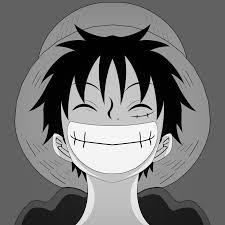

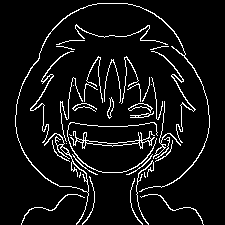

In [ ]:
import cv2
import numpy as np
from google.colab.patches import cv2_imshow # Import cv2_imshow

# Load the image in grayscale
image = cv2.imread('/content/images.jpg', cv2.IMREAD_GRAYSCALE)

# Apply Gaussian Blur to reduce noise
blurred_image = cv2.GaussianBlur(image, (5, 5), 0)

# Apply Canny edge detection
low_threshold = 50
high_threshold = 150
edges = cv2.Canny(blurred_image, low_threshold, high_threshold)

# Display the original image and the edges using cv2_imshow
cv2_imshow(image) # Changed to cv2_imshow
cv2_imshow(edges) # Changed to cv2_imshow


what is GaussianBlur,sobel operator, prewitt operator? explain with opencv

Small kernel size (e.g., 3x3, 5x5): This applies mild smoothing. It can preserve fine details while reducing noise.

Medium kernel size (e.g., 7x7, 9x9): It gives a stronger blur effect, which helps smooth out larger noise and details.

Large kernel size (e.g., 15x15, 21x21): This applies significant smoothing and removes most of the fine details but reduces more noise.

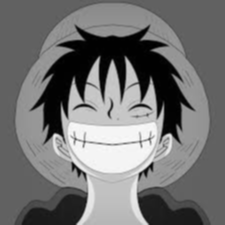

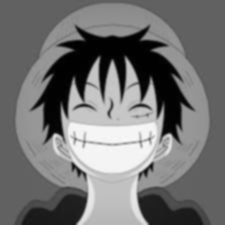

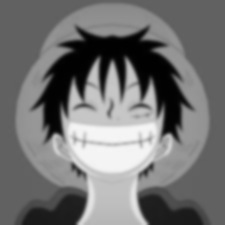

In [ ]:
import cv2
import numpy as np
from google.colab.patches import cv2_imshow # Import cv2_imshow

# Load the image
image = cv2.imread('/content/images.jpg', cv2.IMREAD_GRAYSCALE)

# Apply Gaussian Blur with a small kernel (e.g., 3x3)
blurred_image_3x3 = cv2.GaussianBlur(image, (3, 3), 0)

# Apply Gaussian Blur with a medium kernel (e.g., 5x5)
blurred_image_5x5 = cv2.GaussianBlur(image, (5, 5), 0)

# Apply Gaussian Blur with a large kernel (e.g., 9x9)
blurred_image_9x9 = cv2.GaussianBlur(image, (9, 9), 0)

# Display the blurred images using cv2_imshow
cv2_imshow(blurred_image_3x3) # Changed to cv2_imshow
cv2_imshow(blurred_image_5x5) # Changed to cv2_imshow
cv2_imshow(blurred_image_9x9) # Changed to cv2_imshow


Steps:

Read the image: First, load the image you want to process.

Convert to grayscale: The Sobel operator works on grayscale images.

Apply Sobel filter: Use the Sobel operator to find the gradients in the X and Y directions.

Combine the gradients: Optionally, you can combine the gradients to find the magnitude of the edges.

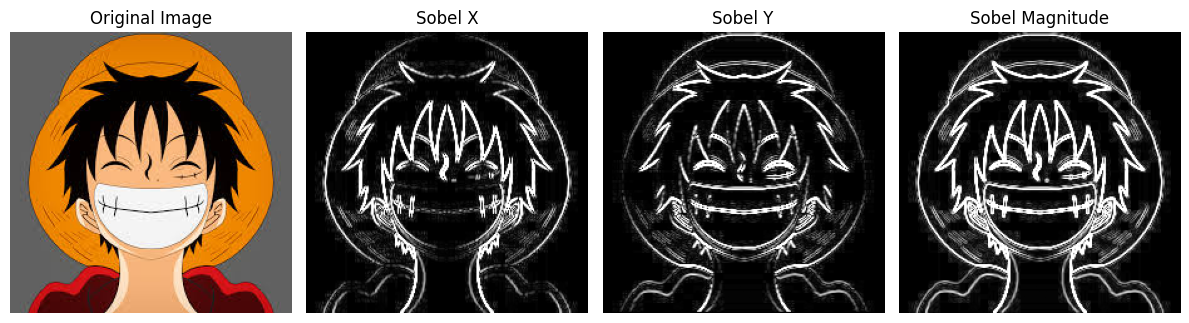

In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Read the image
image = cv2.imread('/content/images.jpg')

# Convert to grayscale
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

# Apply Sobel filter in the X direction
sobel_x = cv2.Sobel(gray, cv2.CV_64F, 1, 0, ksize=3)

# Apply Sobel filter in the Y direction
sobel_y = cv2.Sobel(gray, cv2.CV_64F, 0, 1, ksize=3)

# Calculate the gradient magnitude (optional)
sobel_magnitude = cv2.magnitude(sobel_x, sobel_y)

# Convert the result back to uint8 (optional)
sobel_x = cv2.convertScaleAbs(sobel_x)
sobel_y = cv2.convertScaleAbs(sobel_y)
sobel_magnitude = cv2.convertScaleAbs(sobel_magnitude)

# Display the images
plt.figure(figsize=(12, 6))

plt.subplot(1, 4, 1)
plt.title('Original Image')
plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
plt.axis('off')

plt.subplot(1, 4, 2)
plt.title('Sobel X')
plt.imshow(sobel_x, cmap='gray')
plt.axis('off')

plt.subplot(1, 4, 3)
plt.title('Sobel Y')
plt.imshow(sobel_y, cmap='gray')
plt.axis('off')

plt.subplot(1, 4, 4)
plt.title('Sobel Magnitude')
plt.imshow(sobel_magnitude, cmap='gray')
plt.axis('off')

plt.tight_layout()
plt.show()

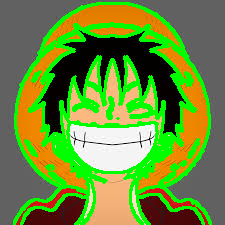

True

In [ ]:
import cv2
import numpy as np
from google.colab.patches import cv2_imshow # Import cv2_imshow

# Step 1: Load the image
image = cv2.imread('/content/images.jpg')

# Step 2: Convert to grayscale
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

# Step 3: Apply edge detection (Canny edge detector)
edges = cv2.Canny(gray, threshold1=100, threshold2=200)

# Step 4: Find contours
contours, hierarchy = cv2.findContours(edges, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

# Step 5: Draw contours on the original image
output_image = image.copy()
cv2.drawContours(output_image, contours, -1, (0, 255, 0), 2)

# Display the result using cv2_imshow instead of cv2.imshow
cv2_imshow(output_image) # Changed to cv2_imshow

# Save the result (optional)
cv2.imwrite('contours_output.jpg', output_image)

# Wait for key press and close windows (Remove or comment out if not needed in Colab)
# cv2.waitKey(0)
# cv2.destroyAllWindows()